<a href="https://colab.research.google.com/github/forminju/DACON_anomaly_detection_/blob/main/0215_1___smartfactory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 1.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import random
import os
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Base & visualization
import pandas as pd
import random
import os
import numpy as np
import warnings
import matplotlib.pylab as plt
import seaborn as sns

#sklearn module & utils
from tqdm.notebook import tqdm
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import StratifiedKFold , KFold, train_test_split, cross_val_score, cross_validate
from sklearn.feature_selection import SelectPercentile
warnings.filterwarnings('ignore') 

#Scaling
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encoding
import category_encoders as ce

#Sampling
from imblearn.over_sampling import BorderlineSMOTE

#Modeling
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, VotingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [ ]:
%cd /content/drive/MyDrive/스마트공장

/content/drive/MyDrive/스마트공장


# SEED 고정

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(37) # Seed 고정

In [ ]:
#Seed 고정
class CFG:
    SEED = 26

# Data Load

In [ ]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [ ]:
train_x = train_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP', 'Y_Class','Y_Quality'])
train_y = train_df['Y_Class']

test_x = test_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])

## Data Pre-processing

In [ ]:
X_group = train_x.loc[:,'X_1':]

In [ ]:
pd.set_option('display.max_seq_items', None)
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [ ]:
li = []
for i in range(len(X_group)):
  if (X_group.iloc[:, i+1].var()) ==0:
    #li.append(X_group.iloc[:,i+1].index)
    print("\'"+'X_' + str(i+2) +"\'", end=",")

'X_3','X_4','X_6','X_10','X_14','X_19','X_26','X_27','X_28','X_29','X_30','X_31','X_32','X_33','X_34','X_35','X_36','X_37','X_67','X_68','X_69','X_70','X_71','X_72','X_74','X_75','X_76','X_77','X_78','X_79','X_80','X_81','X_82','X_83','X_84','X_85','X_89','X_91','X_92','X_93','X_96','X_100','X_104','X_108','X_112','X_116','X_122','X_135','X_142','X_147','X_154','X_158','X_162','X_166','X_170','X_174','X_178','X_182','X_186','X_187','X_188','X_190','X_191','X_192','X_193','X_194','X_195','X_232','X_234','X_235','X_239','X_241','X_244','X_249','X_252','X_255','X_259','X_260','X_264','X_274','X_278','X_282','X_312','X_313','X_314','X_315','X_316','X_317','X_319','X_322','X_323','X_324','X_325','X_326','X_327','X_328','X_329','X_330','X_334','X_336','X_343','X_347','X_351','X_355','X_359','X_363','X_369','X_375','X_376','X_377','X_378','X_381','X_382','X_383','X_390','X_391','X_392','X_409','X_410','X_411','X_424','X_425','X_426','X_427','X_429','X_430','X_431','X_432','X_433','X_434','X_4

# 결측치 처리

In [ ]:
train_x.drop(['X_3','X_4','X_6','X_10','X_14','X_19','X_26','X_27','X_28','X_29','X_30','X_31','X_32','X_33','X_34','X_35','X_36','X_37','X_67','X_68','X_69','X_70','X_71','X_72','X_74','X_75','X_76','X_77','X_78','X_79','X_80','X_81','X_82','X_83','X_84','X_85','X_89','X_91','X_92','X_93','X_96','X_100','X_104','X_108','X_112','X_116','X_122','X_135','X_142','X_147','X_154','X_158','X_162','X_166','X_170','X_174','X_178','X_182','X_186','X_187','X_188','X_190','X_191','X_192','X_193','X_194','X_195','X_232','X_234','X_235','X_239','X_241','X_244','X_249','X_252','X_255','X_259','X_260','X_264','X_274','X_278','X_282','X_312','X_313','X_314','X_315','X_316','X_317','X_319','X_322','X_323','X_324','X_325','X_326','X_327','X_328','X_329','X_330','X_334','X_336','X_343','X_347','X_351','X_355','X_359','X_363','X_369','X_375','X_376','X_377','X_378','X_381','X_382','X_383','X_390','X_391','X_392','X_409','X_410','X_411','X_424','X_425','X_426','X_427','X_429','X_430','X_431','X_432','X_433','X_434','X_466','X_467','X_487','X_503','X_505','X_508','X_512','X_519','X_558','X_561','X_567','X_583','X_617','X_620','X_631','X_633','X_634','X_636','X_638','X_639','X_640','X_641','X_642','X_650','X_672','X_673','X_676','X_691','X_692','X_695','X_715','X_729','X_732','X_743','X_749','X_759','X_760','X_761','X_764','X_776','X_777','X_778','X_836','X_843','X_844','X_849','X_859','X_872','X_873','X_874','X_879','X_880','X_881','X_886','X_887','X_888','X_889','X_912','X_950','X_951','X_952','X_969','X_970','X_971','X_987','X_988','X_989','X_992','X_1003','X_1004','X_1005','X_1006','X_1007','X_1008','X_1020','X_1021','X_1022','X_1023','X_1024','X_1025','X_1070','X_1092','X_1103','X_1119','X_1130','X_1137','X_1146','X_1157','X_1206','X_1216','X_1219','X_1248','X_1249','X_1250','X_1251','X_1252','X_1253','X_1255','X_1293','X_1298','X_1309','X_1311','X_1312','X_1314','X_1316','X_1317','X_1318','X_1319','X_1320','X_1328','X_1361','X_1362','X_1363','X_1364','X_1367','X_1392','X_1393','X_1394','X_1395','X_1396','X_1399','X_1426','X_1457','X_1487','X_1502','X_1503','X_1504','X_1522','X_1531','X_1537','X_1571','X_1572','X_1573','X_1574','X_1575','X_1576','X_1577','X_1578','X_1579','X_1580','X_1581','X_1582','X_1644','X_1645','X_1675','X_1676','X_1677','X_1680','X_1681','X_1683','X_1684','X_1685','X_1687','X_1688','X_1689','X_1691','X_1692','X_1693','X_1695','X_1698','X_1699','X_1700','X_1701','X_1702','X_1707','X_1709','X_1711','X_1719','X_1721','X_1722','X_1723','X_1724','X_1729','X_1733','X_1749','X_1753','X_1754','X_1759','X_1760','X_1765','X_1766','X_1771','X_1772','X_1777','X_1778','X_1783','X_1784','X_1789','X_1790','X_1795','X_1796','X_1801','X_1802','X_1803','X_1807','X_1808','X_1811','X_1823','X_1827','X_1828','X_1835','X_1836','X_1837','X_1838','X_1839','X_1840','X_1841','X_1842','X_1844','X_1845','X_1846','X_1847','X_1848','X_1851','X_1852','X_1869','X_1870','X_1871','X_1872','X_2052','X_2053','X_2054','X_2055','X_2188','X_2189','X_2417','X_2419','X_2420','X_2462','X_2549','X_2550','X_2730','X_2732','X_2733','X_2775','X_2871'],axis=1, inplace=True)
test_x.drop(['X_3','X_4','X_6','X_10','X_14','X_19','X_26','X_27','X_28','X_29','X_30','X_31','X_32','X_33','X_34','X_35','X_36','X_37','X_67','X_68','X_69','X_70','X_71','X_72','X_74','X_75','X_76','X_77','X_78','X_79','X_80','X_81','X_82','X_83','X_84','X_85','X_89','X_91','X_92','X_93','X_96','X_100','X_104','X_108','X_112','X_116','X_122','X_135','X_142','X_147','X_154','X_158','X_162','X_166','X_170','X_174','X_178','X_182','X_186','X_187','X_188','X_190','X_191','X_192','X_193','X_194','X_195','X_232','X_234','X_235','X_239','X_241','X_244','X_249','X_252','X_255','X_259','X_260','X_264','X_274','X_278','X_282','X_312','X_313','X_314','X_315','X_316','X_317','X_319','X_322','X_323','X_324','X_325','X_326','X_327','X_328','X_329','X_330','X_334','X_336','X_343','X_347','X_351','X_355','X_359','X_363','X_369','X_375','X_376','X_377','X_378','X_381','X_382','X_383','X_390','X_391','X_392','X_409','X_410','X_411','X_424','X_425','X_426','X_427','X_429','X_430','X_431','X_432','X_433','X_434','X_466','X_467','X_487','X_503','X_505','X_508','X_512','X_519','X_558','X_561','X_567','X_583','X_617','X_620','X_631','X_633','X_634','X_636','X_638','X_639','X_640','X_641','X_642','X_650','X_672','X_673','X_676','X_691','X_692','X_695','X_715','X_729','X_732','X_743','X_749','X_759','X_760','X_761','X_764','X_776','X_777','X_778','X_836','X_843','X_844','X_849','X_859','X_872','X_873','X_874','X_879','X_880','X_881','X_886','X_887','X_888','X_889','X_912','X_950','X_951','X_952','X_969','X_970','X_971','X_987','X_988','X_989','X_992','X_1003','X_1004','X_1005','X_1006','X_1007','X_1008','X_1020','X_1021','X_1022','X_1023','X_1024','X_1025','X_1070','X_1092','X_1103','X_1119','X_1130','X_1137','X_1146','X_1157','X_1206','X_1216','X_1219','X_1248','X_1249','X_1250','X_1251','X_1252','X_1253','X_1255','X_1293','X_1298','X_1309','X_1311','X_1312','X_1314','X_1316','X_1317','X_1318','X_1319','X_1320','X_1328','X_1361','X_1362','X_1363','X_1364','X_1367','X_1392','X_1393','X_1394','X_1395','X_1396','X_1399','X_1426','X_1457','X_1487','X_1502','X_1503','X_1504','X_1522','X_1531','X_1537','X_1571','X_1572','X_1573','X_1574','X_1575','X_1576','X_1577','X_1578','X_1579','X_1580','X_1581','X_1582','X_1644','X_1645','X_1675','X_1676','X_1677','X_1680','X_1681','X_1683','X_1684','X_1685','X_1687','X_1688','X_1689','X_1691','X_1692','X_1693','X_1695','X_1698','X_1699','X_1700','X_1701','X_1702','X_1707','X_1709','X_1711','X_1719','X_1721','X_1722','X_1723','X_1724','X_1729','X_1733','X_1749','X_1753','X_1754','X_1759','X_1760','X_1765','X_1766','X_1771','X_1772','X_1777','X_1778','X_1783','X_1784','X_1789','X_1790','X_1795','X_1796','X_1801','X_1802','X_1803','X_1807','X_1808','X_1811','X_1823','X_1827','X_1828','X_1835','X_1836','X_1837','X_1838','X_1839','X_1840','X_1841','X_1842','X_1844','X_1845','X_1846','X_1847','X_1848','X_1851','X_1852','X_1869','X_1870','X_1871','X_1872','X_2052','X_2053','X_2054','X_2055','X_2188','X_2189','X_2417','X_2419','X_2420','X_2462','X_2549','X_2550','X_2730','X_2732','X_2733','X_2775','X_2871'],axis=1,inplace=True)

In [ ]:
X_group = train_x.loc[:,'X_1':]

In [ ]:
X_group_pc = pd.DataFrame(X_group.isnull().sum() / len(X_group))

In [ ]:
X_group.isnull().sum() / len(X_group) 

X_1       0.416388
X_2       0.416388
X_5       0.416388
X_7       0.416388
X_8       0.416388
            ...   
X_2870    0.832776
X_2872    1.000000
X_2873    1.000000
X_2874    1.000000
X_2875    1.000000
Length: 2509, dtype: float64

# 결측치 비율이 0.8 이상인 경우 drop

In [ ]:
train_x.drop(X_group_pc[X_group_pc[0] > 0.8].index, axis=1,inplace=True)

In [ ]:
test_x.drop(X_group_pc[X_group_pc[0] > 0.8].index, axis=1,inplace=True)

In [ ]:
train_x[X_group_pc[X_group_pc[0]>0.8].index]

KeyError: ignored

In [ ]:
train_x

,LINE,PRODUCT_CODE,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_12,...,X_2856,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865
0,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,181.6,139.6,131.646667,115.4,209.0,197.286667,189.0,383.0,368.296296,353.0
1,T050307,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,177.1,145.5,128.748276,119.7,198.0,193.296552,185.6,383.0,367.735849,353.0
2,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,183.6,128.0,115.365517,104.0,193.4,179.820690,165.5,383.0,367.320755,353.0
3,T050307,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,179.5,126.2,112.082759,94.5,190.3,181.920690,165.8,384.0,369.188679,353.0
4,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,188.0,152.1,138.066667,109.7,208.6,196.393333,182.6,383.0,367.351852,352.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,T100306,T_31,2.0,95.0,10.0,50.0,10.0,52.0,468.9,473.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,168.2,185.1,159.527586,144.2,198.3,180.810345,168.7,384.0,369.811321,353.0
595,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,153.4,187.6,178.248276,159.6,186.5,176.486207,156.6,383.0,367.018868,352.0
596,T100304,O_31,40.0,94.0,11.0,45.0,10.0,31.0,505.8,510.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Imputation 기법 적용

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')

imputer_output = imputer.fit_transform(train_x)

In [ ]:
train_x = pd.DataFrame(imputer_output, columns=train_x.columns, index=list(train_x.index.values));train_x

,LINE,PRODUCT_CODE,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_12,...,X_2856,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865
0,T050304,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,181.6,139.6,131.646667,115.4,209.0,197.286667,189.0,383.0,368.296296,353.0
1,T050307,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,177.1,145.5,128.748276,119.7,198.0,193.296552,185.6,383.0,367.735849,353.0
2,T050304,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,183.6,128.0,115.365517,104.0,193.4,179.82069,165.5,383.0,367.320755,353.0
3,T050307,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,179.5,126.2,112.082759,94.5,190.3,181.92069,165.8,384.0,369.188679,353.0
4,T050304,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,188.0,152.1,138.066667,109.7,208.6,196.393333,182.6,383.0,367.351852,352.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,T100306,T_31,2.0,95.0,10.0,50.0,10.0,52.0,468.9,473.9,...,177.1,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0
594,T050304,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,168.2,185.1,159.527586,144.2,198.3,180.810345,168.7,384.0,369.811321,353.0
595,T050304,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,153.4,187.6,178.248276,159.6,186.5,176.486207,156.6,383.0,367.018868,352.0
596,T100304,O_31,40.0,94.0,11.0,45.0,10.0,31.0,505.8,510.9,...,177.1,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0


In [ ]:
imputer_output_test = imputer.transform(test_x)

In [ ]:
test_x = pd.DataFrame(imputer_output_test, columns=test_x.columns, index=list(test_x.index.values));test_x

,LINE,PRODUCT_CODE,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_12,...,X_2856,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865
0,T100306,T_31,2.0,94.0,10.0,51.0,10.0,52.0,469.6,474.4,...,177.1,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0
1,T100304,T_31,2.0,93.0,11.0,45.0,10.0,31.0,506.6,511.1,...,177.1,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0
2,T100304,T_31,2.0,95.0,11.0,45.0,10.0,31.0,506.6,511.4,...,177.1,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0
3,T010305,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,159.4,201.3,179.739286,149.9,198.0,191.45,183.8,467.0,444.192308,423.0
4,T010306,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,175.3,227.9,190.664286,162.4,210.2,193.082143,179.7,465.0,443.211539,423.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,T100306,T_31,2.0,91.0,10.0,51.0,10.0,52.0,502.5,511.9,...,177.1,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0
306,T100304,T_31,2.0,96.0,11.0,45.0,10.0,31.0,513.7,518.9,...,177.1,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0
307,T100306,T_31,2.0,91.0,10.0,50.0,10.0,52.0,502.8,511.6,...,177.1,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0
308,T100306,T_31,2.0,95.0,10.0,51.0,10.0,52.0,503.2,512.6,...,177.1,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0


In [ ]:
train_x

,LINE,PRODUCT_CODE,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_12,...,X_2856,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865
0,T050304,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,181.6,139.6,131.646667,115.4,209.0,197.286667,189.0,383.0,368.296296,353.0
1,T050307,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,177.1,145.5,128.748276,119.7,198.0,193.296552,185.6,383.0,367.735849,353.0
2,T050304,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,183.6,128.0,115.365517,104.0,193.4,179.82069,165.5,383.0,367.320755,353.0
3,T050307,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,179.5,126.2,112.082759,94.5,190.3,181.92069,165.8,384.0,369.188679,353.0
4,T050304,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,188.0,152.1,138.066667,109.7,208.6,196.393333,182.6,383.0,367.351852,352.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,T100306,T_31,2.0,95.0,10.0,50.0,10.0,52.0,468.9,473.9,...,177.1,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0
594,T050304,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,168.2,185.1,159.527586,144.2,198.3,180.810345,168.7,384.0,369.811321,353.0
595,T050304,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,153.4,187.6,178.248276,159.6,186.5,176.486207,156.6,383.0,367.018868,352.0
596,T100304,O_31,40.0,94.0,11.0,45.0,10.0,31.0,505.8,510.9,...,177.1,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0


In [ ]:
train_x.T

,0,1,2,3,4,5,6,7,8,9,...,588,589,590,591,592,593,594,595,596,597
LINE,T050304,T050307,T050304,T050307,T050304,T050307,T050304,T050307,T050304,T050307,...,T100306,T100306,T100306,T100306,T100304,T100306,T050304,T050304,T100304,T100306
PRODUCT_CODE,A_31,A_31,A_31,A_31,A_31,A_31,A_31,A_31,A_31,A_31,...,T_31,T_31,T_31,T_31,T_31,T_31,A_31,A_31,O_31,O_31
X_1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,40.0,21.0
X_2,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,...,89.0,94.0,89.0,87.0,98.0,95.0,95.0,95.0,94.0,87.0
X_5,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,11.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X_2861,197.286667,193.296552,179.82069,181.92069,196.393333,190.310345,188.18,184.724138,182.296667,180.29,...,171.437931,171.437931,171.437931,171.437931,171.437931,171.437931,180.810345,176.486207,171.437931,171.437931
X_2862,189.0,185.6,165.5,165.8,182.6,184.7,176.9,173.8,173.8,167.2,...,166.6,166.6,166.6,166.6,166.6,166.6,168.7,156.6,166.6,166.6
X_2863,383.0,383.0,383.0,384.0,383.0,384.0,384.0,393.0,393.0,393.0,...,384.0,384.0,384.0,384.0,384.0,384.0,384.0,383.0,384.0,384.0
X_2864,368.296296,367.735849,367.320755,369.188679,367.351852,368.622641,368.425926,370.283019,373.5,372.87037,...,367.0,367.0,367.0,367.0,367.0,367.0,369.811321,367.018868,367.0,367.0


# 파생변수 생성

In [ ]:
train_x['LINE_PRODUCT'] = train_x['LINE'].str.cat(train_x['PRODUCT_CODE'])

In [ ]:
test_x['LINE_PRODUCT'] = test_x['LINE'].str.cat(test_x['PRODUCT_CODE'])

In [ ]:
# qualitative to quantitative
qual_col = ['LINE', 'PRODUCT_CODE', 'LINE_PRODUCT']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])
    
    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i]) 
print('Done.')

Done.


In [ ]:
X_group_train = train_x.iloc[:,2:1847]
X_group_test = test_x.iloc[:,2:1847]
#test_x.iloc[:,2:1848]

# standardScaler

In [ ]:
from sklearn.decomposition import PCA, KernelPCA, SparsePCA, TruncatedSVD, IncrementalPCA
from sklearn.decomposition import TruncatedSVD

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
#train data 변환
X_group_train = scaler.fit_transform(X_group_train)

#test data 변환
X_group_test = scaler.transform(X_group_test)

In [ ]:
X_group_train = pd.DataFrame(X_group_train)
X_group_test = pd.DataFrame(X_group_test)

# PCA

In [ ]:
method = SparsePCA(n_components=20, alpha=0.001)

In [ ]:
X_group_train = method.fit_transform(X_group_train)

In [ ]:
X_group_test = method.transform(X_group_test)

In [ ]:
X_group_train = pd.DataFrame(X_group_train)
X_group_test = pd.DataFrame(X_group_test); X_group_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,28.527767,-1.431957,26.867369,-2.942849,-27.502945,17.945114,-0.004343,0.218923,-7.092633,0.092957,1.740572,3.252677,-7.205372,-0.052717,-0.179841,3.452638,-0.022339,2.959984,-5.151932,0.028999
1,58.094152,-7.444798,-28.419653,0.564301,6.924671,63.378997,-0.086521,0.033381,8.407144,0.027708,2.010420,3.383363,-2.207119,0.125629,-0.138123,-8.440198,-0.049395,-15.823875,-7.583151,-0.203809
2,28.812787,-1.797377,24.249388,-2.582705,-23.474625,13.703206,-0.019644,0.169158,-11.302300,0.094835,1.740000,3.292477,-5.893924,0.135796,-0.219994,0.576643,-0.011409,5.392006,2.165431,-0.123996
3,55.519238,-7.507803,-26.976479,-0.444981,-3.362122,12.562778,-0.042840,0.055647,-18.491473,-0.003919,-3.934170,-6.026386,-6.283062,-0.021172,-0.086638,-2.062014,-0.021078,-12.355910,-1.385176,-0.051003
4,28.897867,-0.844192,25.666183,-2.795369,-25.409330,14.338683,-0.020837,0.163403,-13.984059,0.072600,-0.352544,0.583351,-4.221648,0.310147,-0.231614,4.810157,0.016465,7.065429,2.185203,-0.128682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,-8.332968,12.126260,-1.931851,8.686477,-0.472687,-0.222064,-6.796605,12.182091,-0.075817,19.092672,-0.025271,-0.047080,0.094046,-8.844219,3.938671,0.015627,-9.672088,0.058251,-0.063513,-5.175578
594,28.713512,-1.600778,25.262950,-0.642147,-3.380272,-5.387760,-0.140555,0.090552,7.106027,0.121747,-1.158212,-4.958187,-8.964918,0.406596,-0.270630,1.240126,0.000497,-7.895619,0.285262,-0.379415
595,27.899666,-2.800977,24.943473,-0.906337,-6.774347,-4.143795,-0.115248,0.135553,6.187261,0.114209,0.536224,-3.083261,-7.895028,0.306276,-0.248569,1.211817,-0.004917,-6.667580,-1.051893,-0.309251
596,-8.341443,12.387684,-1.963670,-2.242446,0.525901,-0.175109,3.774643,5.846478,0.036354,16.678232,-0.184095,-0.332967,0.435669,-17.007776,29.603474,0.018498,-8.936792,-0.087022,-0.069950,15.920424


In [ ]:
X_group_train['0_var'] = X_group_train[0].var()
X_group_train['1_var'] = X_group_train[1].var()
X_group_train['2_var'] = X_group_train[2].var()
X_group_train['3_var'] = X_group_train[3].var()
X_group_train['4_var'] = X_group_train[4].var()
X_group_train['5_var'] = X_group_train[5].var()
X_group_train['6_var'] = X_group_train[6].var()
X_group_train['7_var'] = X_group_train[7].var()
X_group_train['8_var'] = X_group_train[8].var()
X_group_train['9_var'] = X_group_train[9].var()
X_group_train['10_var'] = X_group_train[10].var()
X_group_train['11_var'] = X_group_train[11].var()
X_group_train['12_var'] = X_group_train[12].var()
X_group_train['13_var'] = X_group_train[13].var()
X_group_train['14_var'] = X_group_train[14].var()
X_group_train['15_var'] = X_group_train[15].var()
X_group_train['16_var'] = X_group_train[16].var()
X_group_train['17_var'] = X_group_train[17].var()
X_group_train['18_var'] = X_group_train[18].var()
X_group_train['19_var'] = X_group_train[19].var()
X_group_train

,0,1,2,3,4,5,6,7,8,9,...,10_var,11_var,12_var,13_var,14_var,15_var,16_var,17_var,18_var,19_var
0,28.527767,-1.431957,26.867369,-2.942849,-27.502945,17.945114,-0.004343,0.218923,-7.092633,0.092957,...,21.71214,18.543873,17.910809,15.743922,13.874223,11.982654,11.666699,11.318702,10.654236,10.483142
1,58.094152,-7.444798,-28.419653,0.564301,6.924671,63.378997,-0.086521,0.033381,8.407144,0.027708,...,21.71214,18.543873,17.910809,15.743922,13.874223,11.982654,11.666699,11.318702,10.654236,10.483142
2,28.812787,-1.797377,24.249388,-2.582705,-23.474625,13.703206,-0.019644,0.169158,-11.302300,0.094835,...,21.71214,18.543873,17.910809,15.743922,13.874223,11.982654,11.666699,11.318702,10.654236,10.483142
3,55.519238,-7.507803,-26.976479,-0.444981,-3.362122,12.562778,-0.042840,0.055647,-18.491473,-0.003919,...,21.71214,18.543873,17.910809,15.743922,13.874223,11.982654,11.666699,11.318702,10.654236,10.483142
4,28.897867,-0.844192,25.666183,-2.795369,-25.409330,14.338683,-0.020837,0.163403,-13.984059,0.072600,...,21.71214,18.543873,17.910809,15.743922,13.874223,11.982654,11.666699,11.318702,10.654236,10.483142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,-8.332968,12.126260,-1.931851,8.686477,-0.472687,-0.222064,-6.796605,12.182091,-0.075817,19.092672,...,21.71214,18.543873,17.910809,15.743922,13.874223,11.982654,11.666699,11.318702,10.654236,10.483142
594,28.713512,-1.600778,25.262950,-0.642147,-3.380272,-5.387760,-0.140555,0.090552,7.106027,0.121747,...,21.71214,18.543873,17.910809,15.743922,13.874223,11.982654,11.666699,11.318702,10.654236,10.483142
595,27.899666,-2.800977,24.943473,-0.906337,-6.774347,-4.143795,-0.115248,0.135553,6.187261,0.114209,...,21.71214,18.543873,17.910809,15.743922,13.874223,11.982654,11.666699,11.318702,10.654236,10.483142
596,-8.341443,12.387684,-1.963670,-2.242446,0.525901,-0.175109,3.774643,5.846478,0.036354,16.678232,...,21.71214,18.543873,17.910809,15.743922,13.874223,11.982654,11.666699,11.318702,10.654236,10.483142


In [ ]:
X_group_test['0_var'] = X_group_test[0].var()
X_group_test['1_var'] = X_group_test[1].var()
X_group_test['2_var'] = X_group_test[2].var()
X_group_test['3_var'] = X_group_test[3].var()
X_group_test['4_var'] = X_group_test[4].var()
X_group_test['5_var'] = X_group_test[5].var()
X_group_test['6_var'] = X_group_test[6].var()
X_group_test['7_var'] = X_group_test[7].var()
X_group_test['8_var'] = X_group_test[8].var()
X_group_test['9_var'] = X_group_test[9].var()
X_group_test['10_var'] = X_group_test[10].var()
X_group_test['11_var'] = X_group_test[11].var()
X_group_test['12_var'] = X_group_test[12].var()
X_group_test['13_var'] = X_group_test[13].var()
X_group_test['14_var'] = X_group_test[14].var()
X_group_test['15_var'] = X_group_test[15].var()
X_group_test['16_var'] = X_group_test[16].var()
X_group_test['17_var'] = X_group_test[17].var()
X_group_test['18_var'] = X_group_test[18].var()
X_group_test['19_var'] = X_group_test[19].var()

In [ ]:
X_group_train['0_cumsum'] = X_group_train[0].cumsum()
X_group_train['1_cumsum'] = X_group_train[1].cumsum()
X_group_train['2_cumsum'] = X_group_train[2].cumsum()
X_group_train['3_cumsum'] = X_group_train[3].cumsum()
X_group_train['4_cumsum'] = X_group_train[4].cumsum()
X_group_train['5_cumsum'] = X_group_train[5].cumsum()
X_group_train['6_cumsum'] = X_group_train[6].cumsum()
X_group_train['7_cumsum'] = X_group_train[7].cumsum()
X_group_train['8_cumsum'] = X_group_train[8].cumsum()
X_group_train['9_cumsum'] = X_group_train[9].cumsum()
X_group_train

,0,1,2,3,4,5,6,7,8,9,...,0_cumsum,1_cumsum,2_cumsum,3_cumsum,4_cumsum,5_cumsum,6_cumsum,7_cumsum,8_cumsum,9_cumsum
0,27.718127,0.169881,26.982971,-4.573986,-26.961945,17.666236,0.221375,0.182297,-6.462737,0.005935,...,2.771813e+01,1.698814e-01,2.698297e+01,-4.573986e+00,-2.696195e+01,1.766624e+01,2.213751e-01,1.822972e-01,-6.462737e+00,5.935298e-03
1,59.703990,-5.902849,-28.050498,1.323640,8.605388,63.161538,-0.129824,-0.008660,9.583123,0.010103,...,8.742212e+01,-5.732968e+00,-1.067527e+00,-3.250346e+00,-1.835656e+01,8.082777e+01,9.155103e-02,1.736375e-01,3.120386e+00,1.603817e-02
2,27.819734,-0.212663,24.091698,-4.007179,-23.046472,13.277954,0.189253,0.034805,-11.054589,0.009474,...,1.152419e+02,-5.945631e+00,2.302417e+01,-7.257525e+00,-4.140303e+01,9.410573e+01,2.808043e-01,2.084424e-01,-7.934203e+00,2.551190e-02
3,55.078905,-6.297661,-26.471960,-0.716279,-2.933311,12.614502,0.031414,-0.290334,-18.077945,0.010040,...,1.703208e+02,-1.224329e+01,-3.447790e+00,-7.973804e+00,-4.433634e+01,1.067202e+02,3.122187e-01,-8.189115e-02,-2.601215e+01,3.555189e-02
4,28.171518,0.074283,26.075832,-4.253274,-25.055079,13.885936,0.219027,0.083205,-13.478639,0.009711,...,1.984923e+02,-1.216901e+01,2.262804e+01,-1.222708e+01,-6.939142e+01,1.206062e+02,5.312455e-01,1.314222e-03,-3.949079e+01,4.526303e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,-8.285080,13.238176,-2.313138,7.945856,-0.946187,-0.076977,-7.462722,11.694090,0.030598,18.314303,...,-3.548039e+01,-2.620543e+01,-4.276249e+01,6.546688e+00,8.341939e+00,9.006714e+00,1.157265e+01,-1.424328e+01,-1.390900e+01,-2.418325e+01
594,27.253571,-1.613800,24.453664,-0.601589,-3.665854,-5.088868,-0.020676,0.152838,6.808812,0.021377,...,-8.226818e+00,-2.781923e+01,-1.830882e+01,5.945100e+00,4.676085e+00,3.917846e+00,1.155198e+01,-1.409044e+01,-7.100191e+00,-2.416187e+01
595,26.467276,-2.551205,24.122428,-1.118368,-6.974273,-3.939996,0.015598,0.184942,5.879529,0.018617,...,1.824046e+01,-3.037043e+01,5.813607e+00,4.826732e+00,-2.298188e+00,-2.214984e-02,1.156758e+01,-1.390550e+01,-1.220662e+00,-2.414325e+01
596,-8.990119,14.885036,-2.806595,-2.679679,1.145127,0.010054,3.009020,5.355666,0.575689,15.820179,...,9.250339e+00,-1.548540e+01,3.007012e+00,2.147053e+00,-1.153061e+00,-1.209538e-02,1.457660e+01,-8.549833e+00,-6.449726e-01,-8.323074e+00


In [ ]:
X_group_test['0_cumsum'] = X_group_test[0].cumsum()
X_group_test['1_cumsum'] = X_group_test[1].cumsum()
X_group_test['2_cumsum'] = X_group_test[2].cumsum()
X_group_test['3_cumsum'] = X_group_test[3].cumsum()
X_group_test['4_cumsum'] = X_group_test[4].cumsum()
X_group_test['5_cumsum'] = X_group_test[5].cumsum()
X_group_test['6_cumsum'] = X_group_test[6].cumsum()
X_group_test['7_cumsum'] = X_group_test[7].cumsum()
X_group_test['8_cumsum'] = X_group_test[8].cumsum()
X_group_test['9_cumsum'] = X_group_test[9].cumsum()

In [ ]:
train_line= train_x[['LINE', 'PRODUCT_CODE','LINE_PRODUCT']]
test_line= test_x[['LINE', 'PRODUCT_CODE','LINE_PRODUCT']]

In [ ]:
train_x = pd.concat([train_line, X_group_train], axis=1)
test_x = pd.concat([test_line, X_group_test], axis=1)

In [ ]:
train_x

,LINE,PRODUCT_CODE,LINE_PRODUCT,0,1,2,3,4,5,6,...,10_var,11_var,12_var,13_var,14_var,15_var,16_var,17_var,18_var,19_var
0,2,0,2,28.527767,-1.431957,26.867369,-2.942849,-27.502945,17.945114,-0.004343,...,21.71214,18.543873,17.910809,15.743922,13.874223,11.982654,11.666699,11.318702,10.654236,10.483142
1,3,0,3,58.094152,-7.444798,-28.419653,0.564301,6.924671,63.378997,-0.086521,...,21.71214,18.543873,17.910809,15.743922,13.874223,11.982654,11.666699,11.318702,10.654236,10.483142
2,2,0,2,28.812787,-1.797377,24.249388,-2.582705,-23.474625,13.703206,-0.019644,...,21.71214,18.543873,17.910809,15.743922,13.874223,11.982654,11.666699,11.318702,10.654236,10.483142
3,3,0,3,55.519238,-7.507803,-26.976479,-0.444981,-3.362122,12.562778,-0.042840,...,21.71214,18.543873,17.910809,15.743922,13.874223,11.982654,11.666699,11.318702,10.654236,10.483142
4,2,0,2,28.897867,-0.844192,25.666183,-2.795369,-25.409330,14.338683,-0.020837,...,21.71214,18.543873,17.910809,15.743922,13.874223,11.982654,11.666699,11.318702,10.654236,10.483142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,5,2,7,-8.332968,12.126260,-1.931851,8.686477,-0.472687,-0.222064,-6.796605,...,21.71214,18.543873,17.910809,15.743922,13.874223,11.982654,11.666699,11.318702,10.654236,10.483142
594,2,0,2,28.713512,-1.600778,25.262950,-0.642147,-3.380272,-5.387760,-0.140555,...,21.71214,18.543873,17.910809,15.743922,13.874223,11.982654,11.666699,11.318702,10.654236,10.483142
595,2,0,2,27.899666,-2.800977,24.943473,-0.906337,-6.774347,-4.143795,-0.115248,...,21.71214,18.543873,17.910809,15.743922,13.874223,11.982654,11.666699,11.318702,10.654236,10.483142
596,4,1,4,-8.341443,12.387684,-1.963670,-2.242446,0.525901,-0.175109,3.774643,...,21.71214,18.543873,17.910809,15.743922,13.874223,11.982654,11.666699,11.318702,10.654236,10.483142


# SMOTE

In [ ]:
!pip install mljar-supervised

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 KB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 7.7 MB/s eta 0:00:00
  Created wheel for mljar-supervised: filename=mljar_supervised-0.11.5-py3-none-any.whl size=147063 sha256=44e4e76657e1c19342e43015ebfa7

In [ ]:
import os

from supervised.automl import AutoML

In [ ]:
automl = AutoML(mode="Compete", eval_metric='f1')

In [45]:
automl.fit(train_x.drop(['LINE', 'PRODUCT_CODE'],axis=1), train_y)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[109]	train's f1: 0.962343	validation's f1: 0.716667
[110]	train's f1: 0.966527	validation's f1: 0.716667
[111]	train's f1: 0.966527	validation's f1: 0.716667
[112]	train's f1: 0.968619	validation's f1: 0.716667
[113]	train's f1: 0.970711	validation's f1: 0.716667
[114]	train's f1: 0.972803	validation's f1: 0.716667
[115]	train's f1: 0.972803	validation's f1: 0.716667
[116]	train's f1: 0.974895	validation's f1: 0.716667
[117]	train's f1: 0.974895	validation's f1: 0.716667
[118]	train's f1: 0.976987	validation's f1: 0.716667
[119]	train's f1: 0.979079	validation's f1: 0.716667
[120]	train's f1: 0.979079	validation's f1: 0.716667
[121]	train's f1: 0.979079	validation's f1: 0.716667
[122]	train's f1: 0.981172	validation's f1: 0.716667
[123]	train's f1: 0.981172	validation's f1: 0.725
[124]	train's f1: 0.981172	validation's f1: 0.725
[1]	train's f1: 0.679916	validation's f1: 0.683333
[2]	train's f1: 0.679916	validation's f1: 0.683333
[3]	train's f1: 0.67

AutoML(eval_metric='f1', mode='Compete')

In [ ]:
pred = automl.predict(test_x.drop(['LINE','PRODUCT_CODE'],axis=1))

In [ ]:
LGBM = LGBMClassifier(random_state=42).fit(train_x, train_y)

In [ ]:
preds = LGBM.predict(test_x)
print('Done.')

Done.


# INFERENCE

In [ ]:
submit = pd.read_csv('sample_submission.csv')

In [ ]:
submit['Y_Class'] = pred

In [ ]:
submit.to_csv('0216preds_1.csv', index=False)

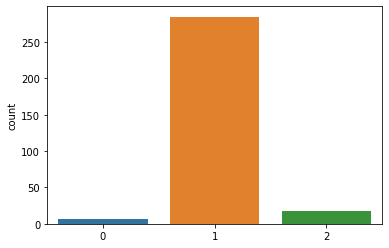

In [51]:
sns.countplot(pred)